## Planteamiento del problema:

Una empresa desea comprender a sus clientes a través de los datos para modificar los productos de acuerdo con las necesidades, comportamientos e inquietudes específicas de los diferentes tipos de clientes.



## Objetivo: 

En este proyecto, como no tenemos una variable etiquetada que intentamos predecir, utilizare algoritmos no supervisados de ML (K-Means y AgglomerativeClustering) con el objetivo de encontrar patrones dentro de nuestro conjunto de datos y particionarlo en trozos más pequeños o clusters.

Este analisis le permitirá a la empresa  modificar sus productos en función de sus clientes objetivo de diferentes tipos de segmentos de clientes. Por ejemplo, en lugar de gastar dinero para comercializar un nuevo producto para cada cliente de la base de datos de la empresa, puede analizar qué segmento de clientes tiene más probabilidades de comprar el producto y luego comercializarlo sólo en ese segmento en particular.



## Descripción del dataset: 

El dataset esta dividio en 4 grupos de atributos, sumando un total de 29 columnas.

El primer grupo se refiere a datos del cliente como educación,ingreso, estado civil, etc.

El segundo grupo se refiere al total gastado por los clientes en los diferentes productos de la empresa.

El tercer grupo se refiere a las promociones y campañas y como actuaron los clientes frente a las mismas.

El último grupo nos informa sobre el lugar en el cual el cliente compro el producto, por ej el sitio web. 




**People**

ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise


**Products**

MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years


**Promotion**

NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


**Place**

NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month

In [316]:
# Importamos las librerías
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [317]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")

In [318]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#### Primer acercamiento a los datos

In [319]:
df.shape

(2240, 29)

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Del resultado anterior, podemos concluir y observar que:

Faltan valores en ingresos

Dt_Customer que indica la fecha en que un cliente se unió a la base de datos no esta en formato fecha

In [321]:
print("Categorias Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Categorias Education:\n", df["Education"].value_counts())

Categorias Marital_Status:
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Categorias Education:
 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


#### Data cleaning

In [322]:
#Para los valores faltantes, voy a "rellenarlos" con la media del ingreso 
from sklearn.impute import SimpleImputer

# Crear un SimpleImputer con la estrategia de la media
imputer = SimpleImputer(strategy='mean')

# Ajustar el imputer y transformar los datos
df['Income'] = imputer.fit_transform(df[['Income']])



In [323]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [324]:
# cambiar tipo de dato a fecha
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

#### Feature Engineering

- Eliminar columnas innecesarias a mi criterio 

- Realizaré los siguientes pasos para diseñar algunas columnas nuevas:

    Extraer la "Edad" de un cliente mediante el "Año_Nacimiento".

    Crear una característica "Gastado" que indica el monto total gastado por el cliente en los diferentes productos.
    
    Crear una caracteristica "Total comprado" que sea la suma del total comprado en sitio web, store, etc.

    Simplificar  la columna "Marital_Status" que solo sea casado o soltero. 

    Crear la columna "Niños" para indicar el total de niños en un hogar, es decir, niños y adolescentes.

    Simplificar en tres categorías en "Educación" 

    Crear una columna con el año de la suscripción
    







In [325]:
df["Age"] = 2024-df["Year_Birth"]

df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

df["Total_Purchases"] = df["NumWebPurchases"]+ df["NumCatalogPurchases"]+ df["NumStorePurchases"]

df["Marital_Status"]=df["Marital_Status"].replace({"Married":"Married", "Together":"Married", "Absurd":"Single", "Alone":"Single",
                                                       "Widow":"Single", "YOLO":"Single", "Divorced":"Single", "Single":"Single",})

df["Children"]=df["Kidhome"]+df["Teenhome"]

df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#para identificar mejor los productos
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

df["year_Dt"] = df['Dt_Customer'].dt.year

#Eliminar algunas de las columnas redundantes
to_drop = [ "Z_CostContact", "Z_Revenue", "Year_Birth", "ID", "Kidhome","Teenhome",'Dt_Customer']
df = df.drop(to_drop, axis=1)

In [326]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'Wines', 'Fruits',
       'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Spent',
       'Total_Purchases', 'Children', 'year_Dt'],
      dtype='object')

#### EDA

In [327]:
df.describe()

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Total_Purchases,Children,year_Dt
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,...,0.072768,0.064286,0.013393,0.009375,0.149107,55.194196,605.798214,12.537054,0.950446,2013.028125
std,25037.797168,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,...,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069,602.249288,7.205741,0.751803,0.684554
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,0.000000,0.000000,2012.000000
25%,35538.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,68.750000,6.000000,0.000000,2013.000000
50%,51741.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,396.000000,12.000000,1.000000,2013.000000
75%,68289.750000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,1045.500000,18.000000,1.000000,2013.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,131.000000,2525.000000,32.000000,3.000000,2014.000000


Las estadísticas anteriores muestran algunas discrepancias en el ingreso y la edad medios y en el ingreso y la edad máximos.

La edad máxima es 131 años, ya que calculé la edad que tendría hoy (es decir, 2024) y los datos son antiguos.


In [328]:
#Eliminar los valores atípicos estableciendo un límite a la edad y los ingresos.
df = df[(df["Age"]<90)]
df = df[(df["Income"]<100000)]
print("Total de filas con los outliers eliminados:", len(df))

Total de filas con los outliers eliminados: 2224


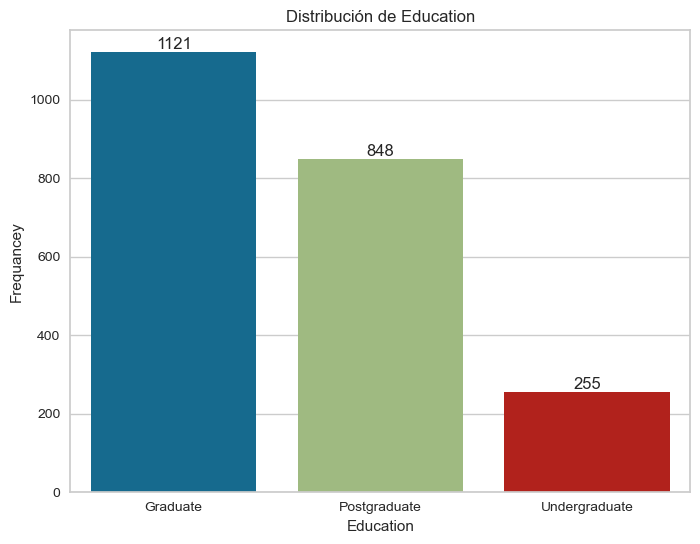

In [329]:
plt.figure(figsize=(8,6))
plt.title("Distribución de Education")
figure = sns.countplot(x= df['Education'])
for contain in figure.containers :
    figure.bar_label(contain)
plt.ylabel("Frequancey")

plt.show()

In [330]:
pd.DataFrame(df.groupby("Education")["Income"].mean()).round(2).sort_values(by="Income")

,Income
Education,
Undergraduate,41894.49
Graduate,51849.05
Postgraduate,53948.99


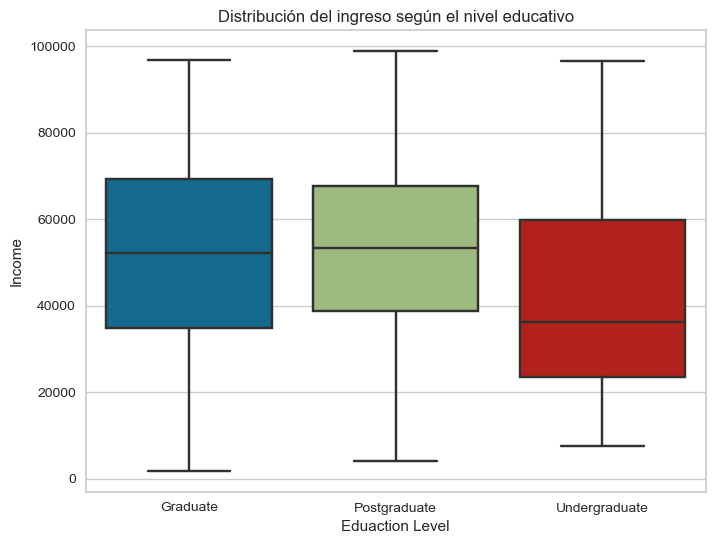

In [331]:
plt.figure(figsize=(8,6))
plt.title("Distribución del ingreso según el nivel educativo")
sns.boxplot(x= df['Education'] , y =df["Income"])

plt.ylabel("Income")
plt.xlabel("Eduaction Level")
plt.show()

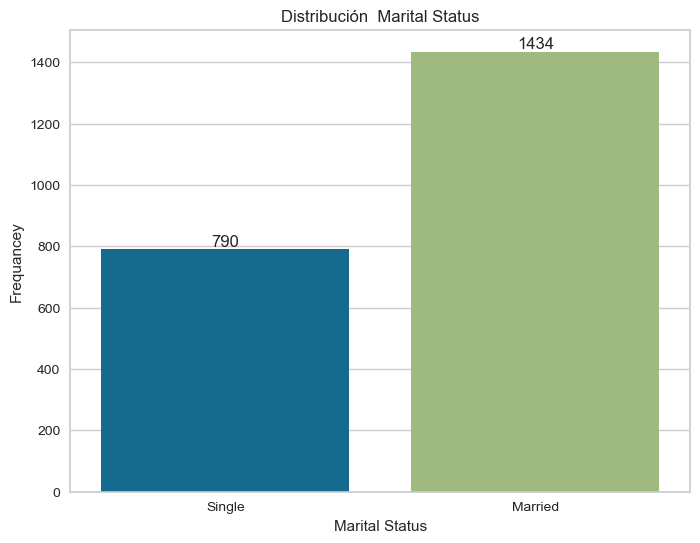

In [332]:
plt.figure(figsize=(8,6))
plt.title("Distribución  Marital Status")
figure = sns.countplot(x= df['Marital_Status'])
for contain in figure.containers :
    figure.bar_label(contain)
plt.ylabel("Frequancey")
plt.xlabel("Marital Status")
plt.show()

In [333]:
pd.DataFrame(df.year_Dt.value_counts()) 

,year_Dt
2013,1179
2014,553
2012,492


Contamos con 3 años de suscripciones, la mayoría en 2013.

<Axes: xlabel='Age', ylabel='Count'>

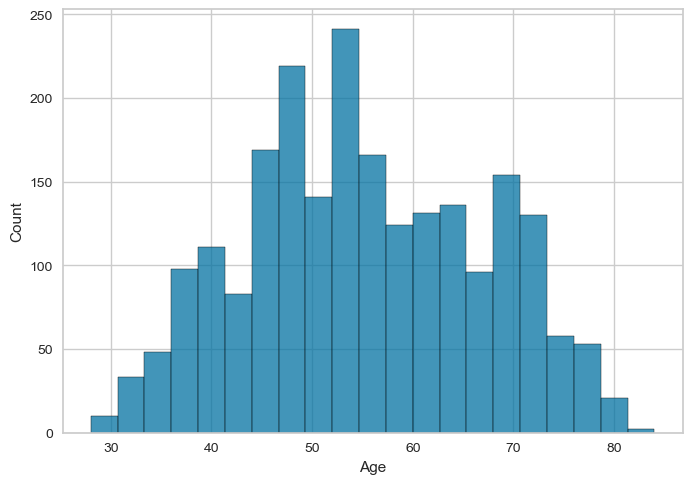

In [334]:
sns.histplot(df['Age'])

In [335]:
# Analisis de lo gastado por producto
cols = df[['Wines', 'Fruits',
       'Meat', 'Fish', 'Sweets',
       'Gold']]


In [336]:
# Calcular el total gastado en cada producto
totals = cols.sum()

# Crear un DataFrame con los totales
totals_df = pd.DataFrame(totals, columns=['Total'])

# Resetear el índice para que los nombres de los productos sean una columna
totals_df.reset_index(inplace=True)
totals_df.columns = ['Product', 'Total']


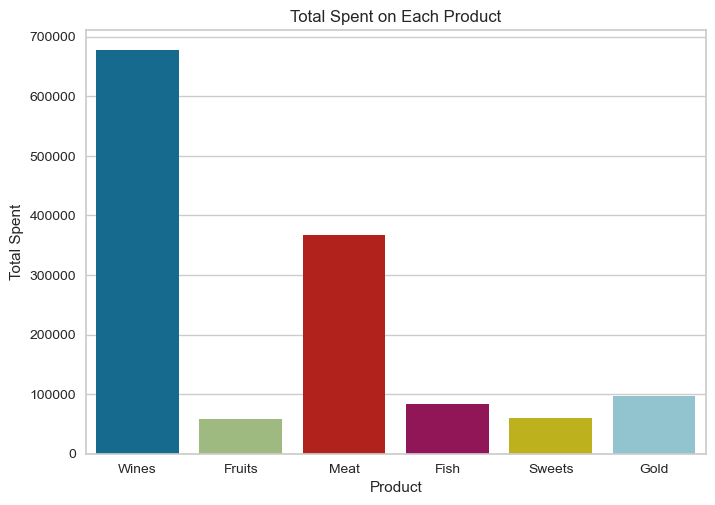

In [337]:
# Crear el gráfico de barras
sns.barplot(x='Product', y='Total', data=totals_df)


plt.xlabel('Product')
plt.ylabel('Total Spent')
plt.title('Total Spent on Each Product')


plt.show()

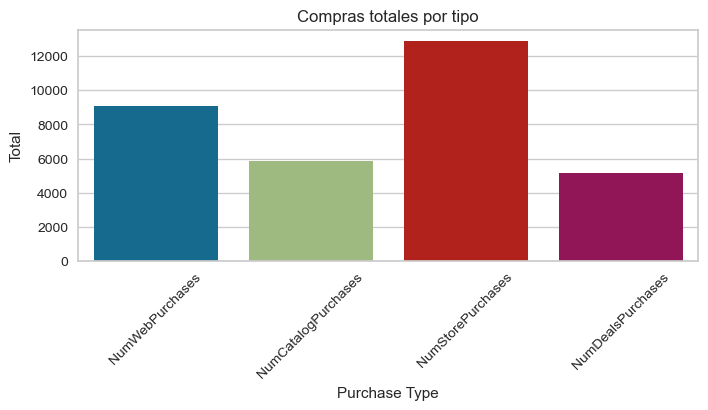

In [338]:
totals = {
    'Purchase Type': ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases'],
    'Total Purchases': [
        df['NumWebPurchases'].sum(),
        df['NumCatalogPurchases'].sum(),
        df['NumStorePurchases'].sum(),
        df['NumDealsPurchases'].sum()
    ]
}

df_totals = pd.DataFrame(totals)

# Create the bar chart
plt.figure(figsize=(8, 3))
sns.barplot(x='Purchase Type', y='Total Purchases', data=df_totals)
plt.title('Compras totales por tipo')

plt.ylabel('Total')
plt.xticks(rotation=45)  # Rotates labels to avoid overlap
plt.show()

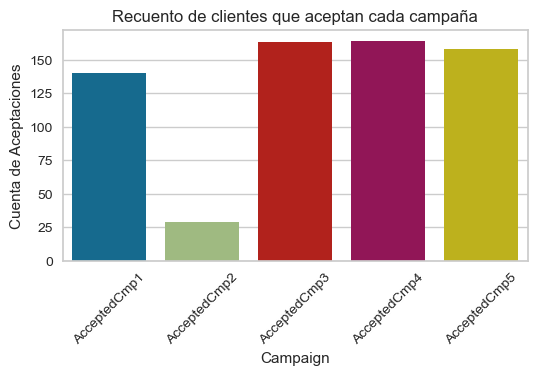

In [339]:
# Campañas 
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
counts = df[campaigns].sum().reset_index()
counts.columns = ['Campaign', 'Cuenta de Aceptaciones']

# Create the bar chart
plt.figure(figsize=(6, 3))
sns.barplot(x='Campaign', y='Cuenta de Aceptaciones', data=counts)
plt.title('Recuento de clientes que aceptan cada campaña')
plt.xlabel('Campaign')
plt.ylabel('Cuenta de Aceptaciones')
plt.xticks(rotation=45)  
plt.show()

#### DATA PREPROCESSING

- Label encoding 
- Scaling 
- Dimensionality reduction

In [340]:
#Copia

db = df.copy()

In [341]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("variables categoricas :", object_cols)

variables categoricas : ['Education', 'Marital_Status']


In [342]:
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    


In [343]:
df.head()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Total_Purchases,Children,year_Dt
0,0,1,58138.0,58,635,88,546,172,88,88,...,0,0,0,0,1,67,1617,22,0,2012
1,0,1,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,0,70,27,4,2,2014
2,0,0,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,0,59,776,20,0,2013
3,0,0,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,0,40,53,6,1,2014
4,1,0,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,0,43,422,14,1,2014


In [344]:
df['Education'].unique()

array([0, 1, 2])

In [345]:
#Copia

ds = df.copy()


In [346]:
ds.head()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Total_Purchases,Children,year_Dt
0,0,1,58138.0,58,635,88,546,172,88,88,...,0,0,0,0,1,67,1617,22,0,2012
1,0,1,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,0,70,27,4,2,2014
2,0,0,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,0,59,776,20,0,2013
3,0,0,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,0,40,53,6,1,2014
4,1,0,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,0,43,422,14,1,2014


In [347]:
# Identificar columnas continuas y binarias
continuous_cols = [ 'Income', 'Recency', 'Wines', 'Fruits',
       'Meat', 'Fish', 'Sweets', 'Gold','Age', 'Spent','year_Dt','Children','Education']
binary_cols = [ 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']

In [348]:
# Escalar las características continuas
scaler = StandardScaler()
ds[continuous_cols] = scaler.fit_transform(ds[continuous_cols])


In [349]:
ds.head()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Total_Purchases,Children,year_Dt
0,-0.893447,1,0.324008,0.306184,0.982514,1.560662,1.735041,2.460929,1.496417,0.848721,...,0,0,0,0,1,1.015836,1.685609,22,-1.269990,-1.500060
1,-0.893447,1,-0.252397,-0.384894,-0.872393,-0.637589,-0.726010,-0.651099,-0.634550,-0.731178,...,0,0,0,0,0,1.272216,-0.961251,4,1.392082,1.419969
2,-0.893447,0,0.982568,-0.799541,0.361239,0.575239,-0.174552,1.344260,-0.144672,-0.037564,...,0,0,0,0,0,0.332156,0.285603,20,-1.269990,-0.040045
3,-0.893447,0,-1.215093,-0.799541,-0.872393,-0.561787,-0.662205,-0.504651,-0.585562,-0.750445,...,0,0,0,0,0,-1.291583,-0.917969,6,0.061046,1.419969
4,0.569753,0,0.331583,1.550125,-0.390831,0.423635,-0.215569,0.154367,0.002291,-0.557775,...,0,0,0,0,0,-1.035203,-0.303698,14,0.061046,1.419969


#### Dimensionality reduction con with PCA

Realizaré una reducción de dimensionalidad antes de entrenar K-means y AgglomerativeClustering.

Nuestro dataset cuenta con muchas columnas y los datos pueden volverse muy complejos y difíciles de manejar. PCA mantiene la mayor parte de la información relevante, lo que simplifica el problema y reduce el costo computacional.

In [350]:
pca = PCA()
PCA_ds = pd.DataFrame(pca.fit_transform(ds), index=ds.index, columns=[f'Component {i}' for i in range(pca.n_components_)])
PCA_ds.head()

,Component 0,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,...,Component 17,Component 18,Component 19,Component 20,Component 21,Component 22,Component 23,Component 24,Component 25,Component 26
0,10.935214,1.331448,7.616381,1.845122,1.635521,0.949904,-0.787546,-0.457929,-0.805398,0.576295,...,0.281270,0.126853,0.057429,-0.491669,0.089027,0.002562,0.002725,-0.011959,7.076373e-14,-2.661702e-15
1,-9.954356,-1.783496,0.453500,0.510815,-1.684908,-0.942034,-0.809487,-1.358221,-0.580440,0.687327,...,-0.027983,-0.166326,0.023807,0.002247,-0.037881,0.022790,0.005450,-0.012190,-1.347811e-15,-1.378424e-15
2,8.865060,0.906346,-2.090566,-3.463355,0.034008,0.170282,0.019863,-1.016291,0.007728,-0.246722,...,-0.434758,-0.065982,-0.161273,-0.043396,-0.011494,0.021613,0.007010,-0.010617,-6.610215e-14,3.610327e-15
3,-7.844993,-0.384916,-1.062606,-0.456691,-0.104584,0.163585,0.389088,-1.158813,1.602076,0.403786,...,0.375122,0.004266,0.042954,-0.061112,-0.027643,0.000607,-0.001650,-0.008769,1.359109e-14,-2.588893e-15
4,1.617959,1.287875,-0.077801,1.167881,-1.904246,0.310790,-0.002549,1.509441,1.669028,1.371912,...,-0.557997,0.042458,-0.041842,-0.108125,-0.016652,0.014276,0.013960,-0.005295,7.891235e-14,2.624586e-14


In [351]:
## Esta función grafica la relación de varianza explicada acumulada para un objeto PCA ajustado
from itertools import accumulate

def plot_explained_variance(pca):
    acc = [*accumulate(pca.explained_variance_ratio_)]
    fig, ax = plt.subplots(1, figsize=(50, 20))
    ax.stackplot(range(pca.n_components_), acc)
    ax.scatter(range(pca.n_components_), acc, color='black')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, pca.n_components_-1)
    ax.tick_params(axis='both', labelsize=36)
    ax.set_xlabel('N Components', fontsize=48)
    ax.set_ylabel('Accumulated explained variance', fontsize=48)
    plt.tight_layout()
    plt.show()

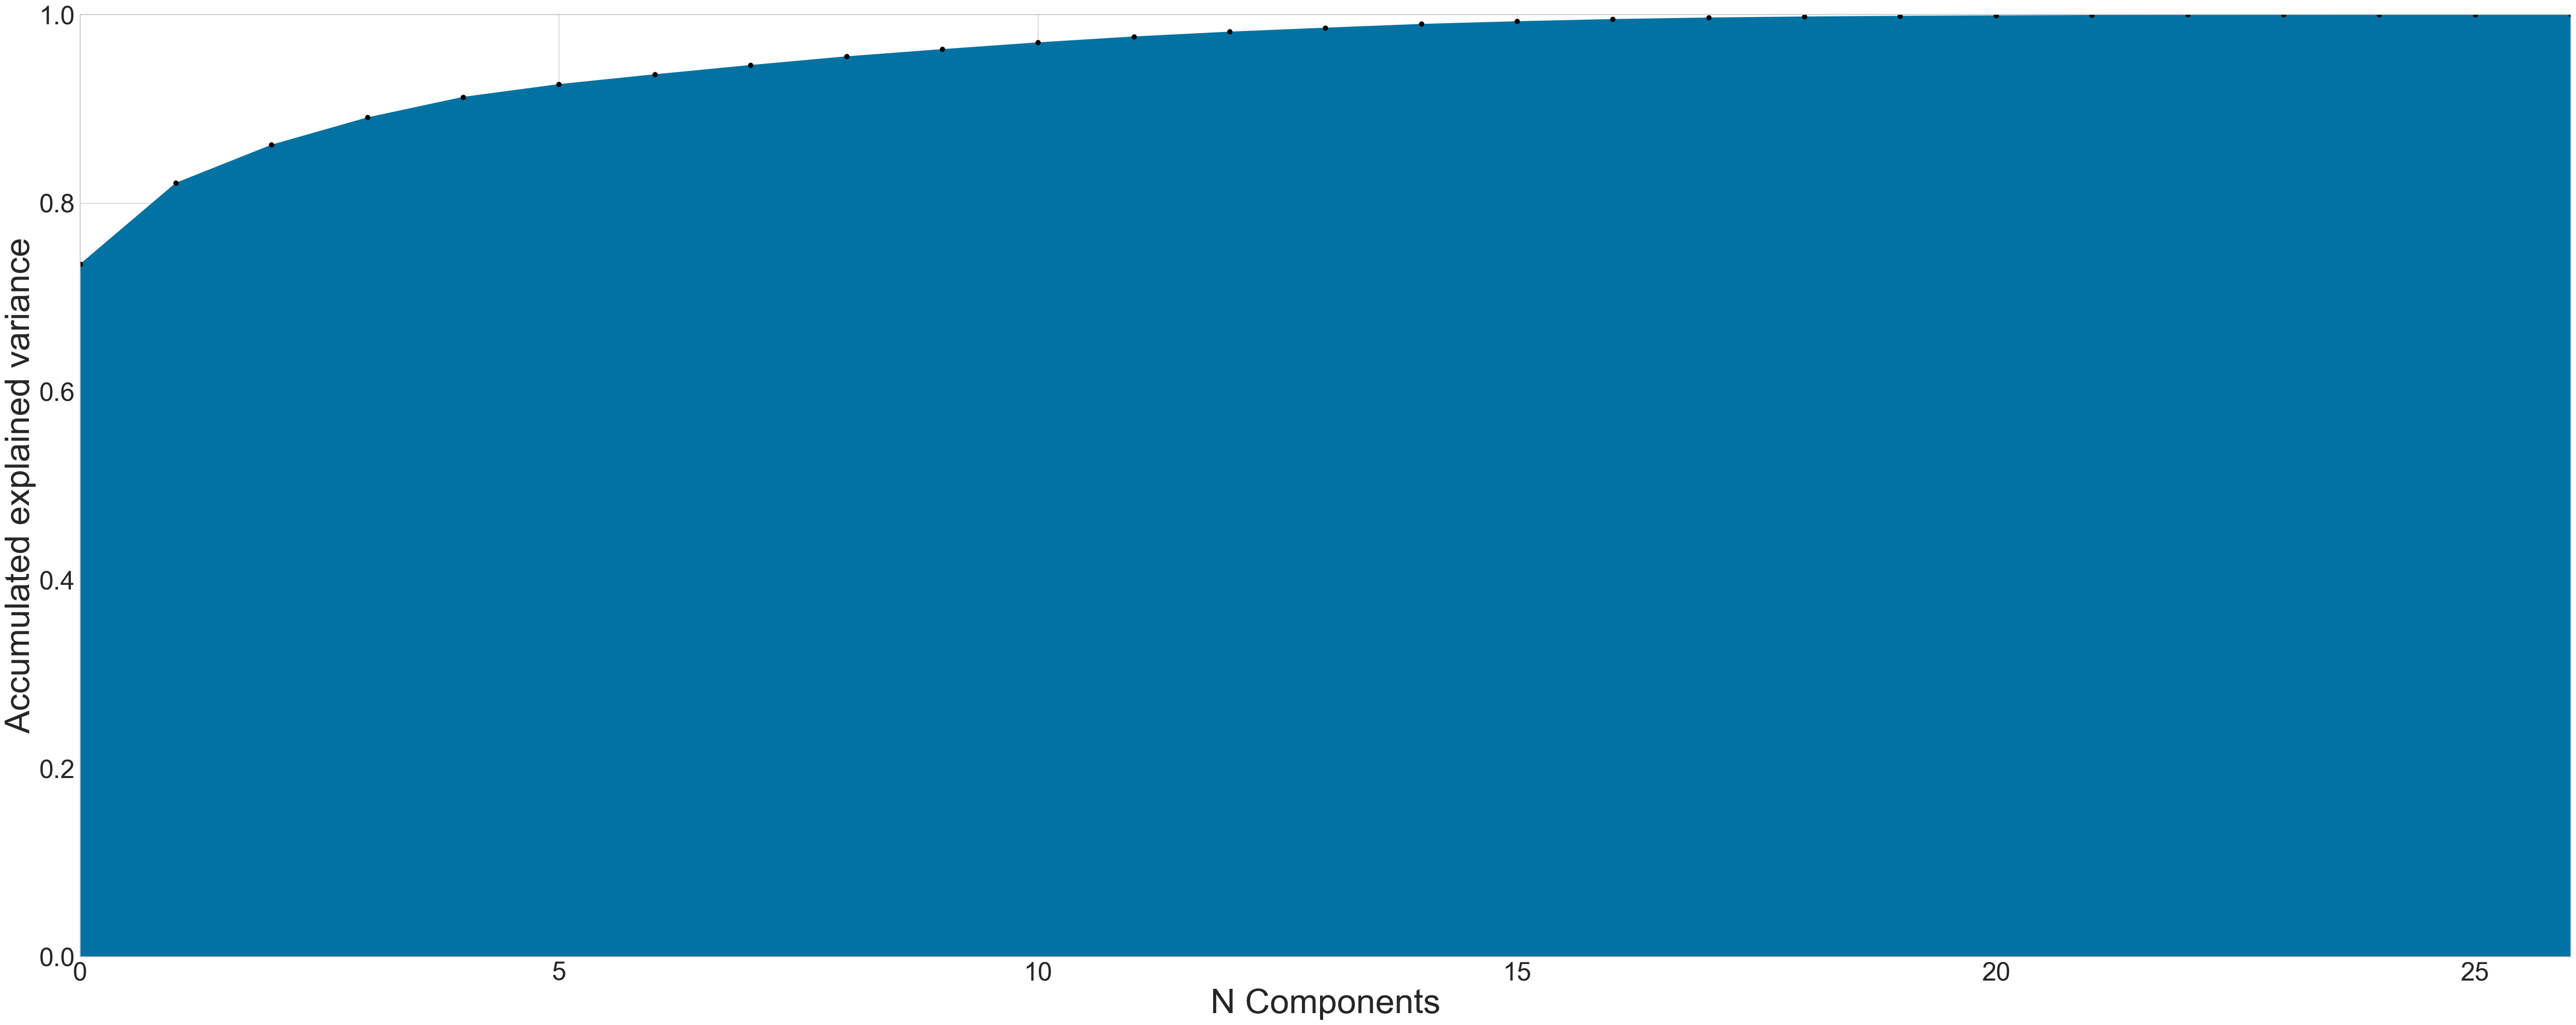

In [352]:
plot_explained_variance(pca)

In [353]:
# Nos quedamos con el 85% de varianza explicada 
threshold = 0.85
num = next(i for i, x in enumerate(accumulate(pca.explained_variance_ratio_), 1) if x >= threshold)
print(f'Podemos retener los {num} componentes y descartar {pca.n_components_-num},')
print(f'Manteniendo  >={100 * threshold}%  de la varianza explicada!')

Podemos retener los 3 componentes y descartar 24,
Manteniendo  >=85.0%  de la varianza explicada!


In [354]:
PCA_ds.drop([f'Component {i}' for i in range(num, pca.n_components_)], axis=1, inplace=True)
PCA_ds.head()

,Component 0,Component 1,Component 2
0,10.935214,1.331448,7.616381
1,-9.954356,-1.783496,0.453500
2,8.865060,0.906346,-2.090566
3,-7.844993,-0.384916,-1.062606
4,1.617959,1.287875,-0.077801


In [355]:
PCA_ds.corr().style.background_gradient(cmap='coolwarm')

,Component 0,Component 1,Component 2
Component 0,1.000000,0.000000,-0.000000
Component 1,0.000000,1.000000,0.000000
Component 2,-0.000000,0.000000,1.000000


Como puede ver, las correlaciones de los 3 componentes principales ahora son cero, lo que significa que hemos descorrelacionado  con éxito y hemos obtenido características que son linealmente independientes entre sí.

#### Clustering

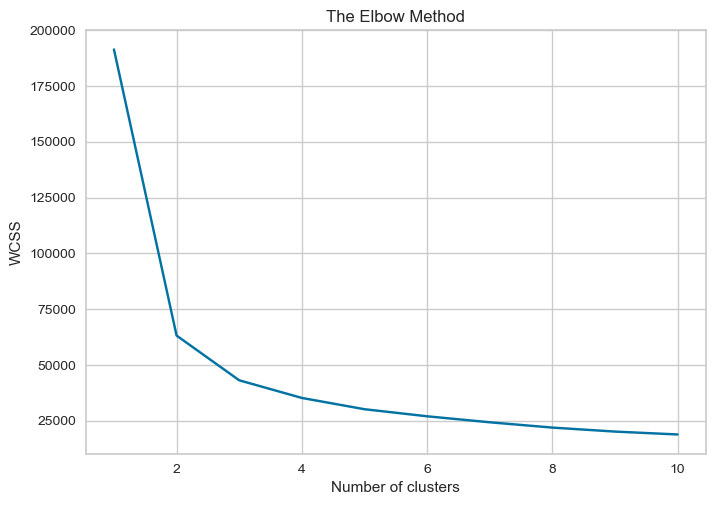

In [358]:
# Metodo del Codo para encontrar el numero optimo de clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(PCA_ds)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Elbow Method


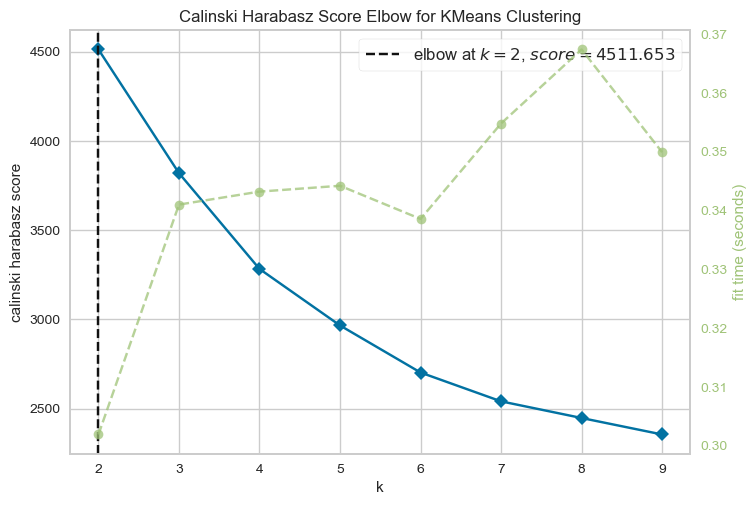

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [359]:
print('Elbow Method')
Elbow_M = KElbowVisualizer(KMeans(init = 'k-means++', random_state = 42), k=(2,10), metric= 'calinski_harabasz')
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [360]:
from sklearn.metrics import silhouette_score
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init = 'k-means++', random_state = 42)
    kmeans.fit(PCA_ds)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(PCA_ds, labels)
    print(f"For k = {k}, the average silhouette score is {silhouette_avg:.2f}")
    
#valores más altos de Silhouette indican una mejor separación entre los grupos.

For k = 2, the average silhouette score is 0.56
For k = 3, the average silhouette score is 0.46
For k = 4, the average silhouette score is 0.44
For k = 5, the average silhouette score is 0.41
For k = 6, the average silhouette score is 0.41
For k = 7, the average silhouette score is 0.40
For k = 8, the average silhouette score is 0.31
For k = 9, the average silhouette score is 0.31


In [361]:
# Creando el k-Means para los 2 grupos encontrados
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42) #k-means++ acelera la convergencia, respecto de random
y_kmeans = kmeans.fit_predict(PCA_ds)

In [362]:
y_kmeans

array([0, 1, 0, ..., 0, 0, 1])

In [363]:
db['kmeans_cluster']=y_kmeans
db.head()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Total_Purchases,Children,year_Dt,kmeans_cluster
0,Graduate,Single,58138.0,58,635,88,546,172,88,88,...,0,0,0,1,67,1617,22,0,2012,0
1,Graduate,Single,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,70,27,4,2,2014,1
2,Graduate,Married,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,59,776,20,0,2013,0
3,Graduate,Married,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,40,53,6,1,2014,1
4,Postgraduate,Married,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,43,422,14,1,2014,0


#### Agglomerative Clustering model 

Elbow Method


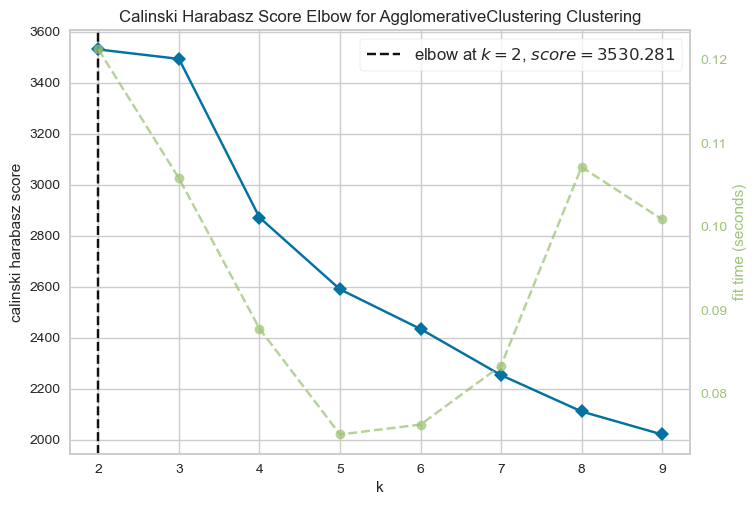

<Axes: title={'center': 'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [364]:
print('Elbow Method')
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=(2,10), metric= 'calinski_harabasz')
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [365]:

AC = AgglomerativeClustering(n_clusters=2)

agg = AC.fit_predict(PCA_ds)


In [366]:
PCA_ds["Clusters"] = agg

db["Agg-Clusters"] = agg

In [367]:
db.head()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp2,Complain,Response,Age,Spent,Total_Purchases,Children,year_Dt,kmeans_cluster,Agg-Clusters
0,Graduate,Single,58138.0,58,635,88,546,172,88,88,...,0,0,1,67,1617,22,0,2012,0,1
1,Graduate,Single,46344.0,38,11,1,6,2,1,6,...,0,0,0,70,27,4,2,2014,1,0
2,Graduate,Married,71613.0,26,426,49,127,111,21,42,...,0,0,0,59,776,20,0,2013,0,1
3,Graduate,Married,26646.0,26,11,4,20,10,3,5,...,0,0,0,40,53,6,1,2014,1,0
4,Postgraduate,Married,58293.0,94,173,43,118,46,27,15,...,0,0,0,43,422,14,1,2014,0,0


#### Evaluating the Models

Dado que se trata de una agrupación no supervisada,no tenemos una etiqueta para evaluar o calificar nuestro modelo.

El propósito de esta sección es utilizar algunas metricas que nos permitan quedarnos con el mejor modelo, es decir, aquel que mejor logro captar los patrones en los datos para formar los clusters.


**En primer lugar, echemos un vistazo a la distribución de cada grupo para cada modelo entrenado**

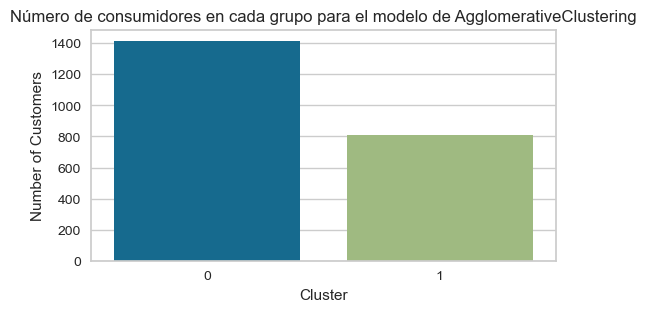

In [368]:

plt.figure(figsize=(6, 3))
sns.countplot(x='Agg-Clusters', data=db)
plt.title('Número de consumidores en cada grupo para el modelo de AgglomerativeClustering')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

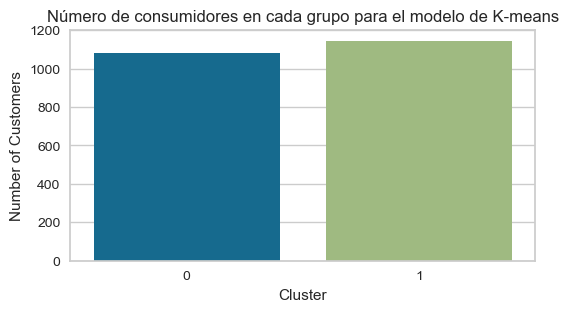

In [369]:
plt.figure(figsize=(6, 3))
sns.countplot(x='kmeans_cluster', data=db)
plt.title('Número de consumidores en cada grupo para el modelo de K-means')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

**El Índice Davies-Bouldin evalúa la relación entre la dispersión dentro de los clusters y la separación entre los clusters. Valores más bajos indican mejores clusters.**

In [370]:
from sklearn.metrics import davies_bouldin_score

# Calcular el Índice Davies-Bouldin para ambos conjuntos de etiquetas
db_score1 = round(davies_bouldin_score(PCA_ds,y_kmeans),2)
db_score2 = round(davies_bouldin_score(PCA_ds,agg),2)

print(f'Davies-Bouldin Score K-Means: {db_score1}')
print(f'Davies-Bouldin Score AgglomerativeClustering: {db_score2}')


Davies-Bouldin Score K-Means: 0.63
Davies-Bouldin Score AgglomerativeClustering: 0.7


 K-Means tiene un score mas bajo que AgglomerativeClustering. 

**Calinski-Harabasz Index (Variance Ratio Criterion)**
El Índice Calinski-Harabasz mide la dispersión dentro de los clusters y entre los clusters. Valores más altos indican mejores clusters.

In [371]:
from sklearn.metrics import calinski_harabasz_score

# Calcular el Índice Calinski-Harabasz para ambos modelos
ch_score1 = round(calinski_harabasz_score(PCA_ds,y_kmeans),2)
ch_score2 = round(calinski_harabasz_score(PCA_ds,agg),2)

print(f'Calinski-Harabasz Score K-Means: {ch_score1}')
print(f'Calinski-Harabasz Score AgglomerativeClustering: {ch_score2}')


Calinski-Harabasz Score K-Means: 4508.13
Calinski-Harabasz Score AgglomerativeClustering: 3545.74


K-Means para Calinski-Harabasz tiene un score mas alto que AgglomerativeClustering, indicando una mejor agrupación.

#### Chequear clusters formados por K-means

In [372]:
db.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'Wines', 'Fruits',
       'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Spent',
       'Total_Purchases', 'Children', 'year_Dt', 'kmeans_cluster',
       'Agg-Clusters'],
      dtype='object')

In [373]:
# Resumen estadístico por cluster para K-means
cluster_summary = db.groupby('kmeans_cluster').mean().T
cluster_summary

kmeans_cluster,0,1
Income,67522.362616,36417.464428
Recency,49.073216,49.200873
Wines,559.946247,63.734498
Fruits,47.572753,6.124891
Meat,306.196478,32.524891
Fish,67.601483,9.264629
Sweets,49.034291,6.054148
Gold,70.427247,18.998253
NumDealsPurchases,2.468026,2.189520
NumWebPurchases,5.944393,2.331878


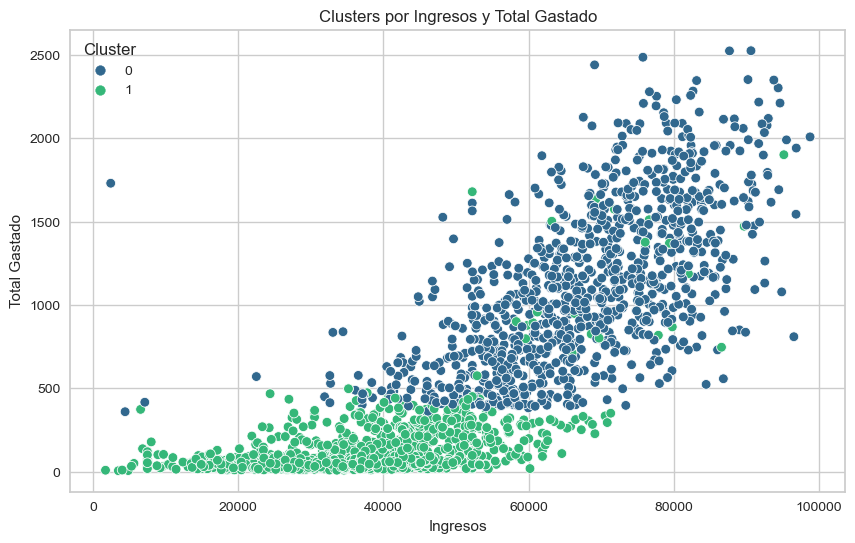

In [374]:
# Visualización de clusters por 'Ingresos' y 'TotalGastado'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=db, x='Income', y='Spent', hue='kmeans_cluster', palette='viridis')
plt.title('Clusters por Ingresos y Total Gastado')
plt.xlabel('Ingresos')
plt.ylabel('Total Gastado')
plt.legend(title='Cluster')
plt.show()


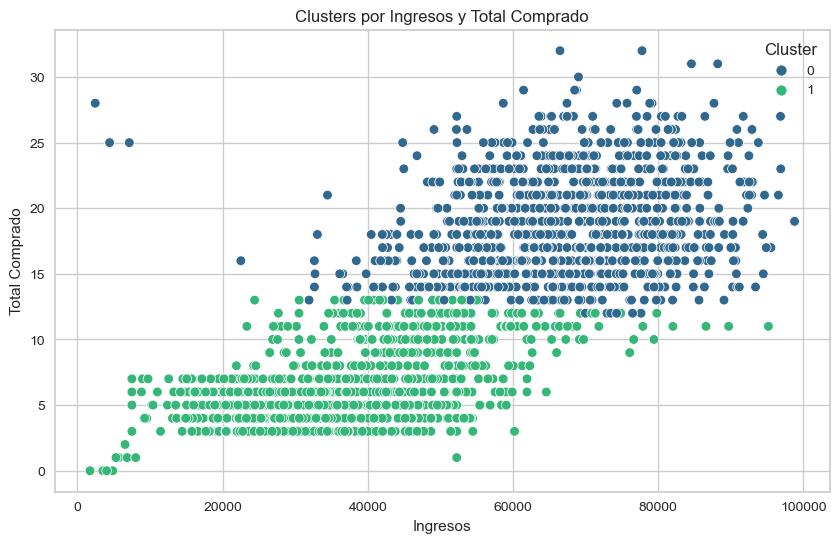

In [375]:
# Visualización de clusters por 'Ingresos' y 'Total Comprado'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=db, x='Income', y='Total_Purchases', hue='kmeans_cluster', palette='viridis')
plt.title('Clusters por Ingresos y Total Comprado')
plt.xlabel('Ingresos')
plt.ylabel('Total Comprado')
plt.legend(title='Cluster')
plt.show()


In [376]:
db.groupby(["kmeans_cluster","Total_Purchases"])["Total_Purchases"].sum()

kmeans_cluster  Total_Purchases
0               12                   84
                13                  650
                14                 1386
                15                 1260
                16                 1568
                17                 1513
                18                 1872
                19                 1615
                20                 1700
                21                 1806
                22                 1628
                23                 1472
                24                 1248
                25                  975
                26                  598
                27                  567
                28                  224
                29                  145
                30                   30
                31                   62
                32                   96
1               0                     0
                1                     5
                2                     2
        

In [377]:
db.groupby(["kmeans_cluster","Education"])["Education"].count()

kmeans_cluster  Education    
0               Graduate         548
                Postgraduate     447
                Undergraduate     84
1               Graduate         573
                Postgraduate     401
                Undergraduate    171
Name: Education, dtype: int64

In [378]:
db.groupby(["kmeans_cluster","Marital_Status"])["Marital_Status"].count()

kmeans_cluster  Marital_Status
0               Married           692
                Single            387
1               Married           742
                Single            403
Name: Marital_Status, dtype: int64

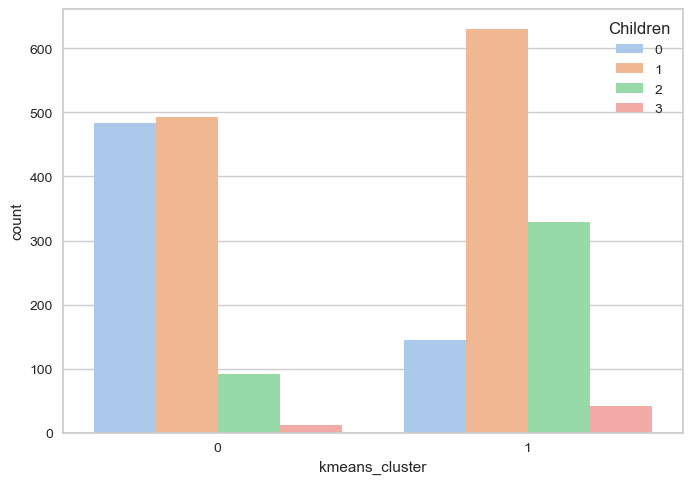

In [379]:
sns.countplot(data=db, x='kmeans_cluster', hue='Children' ,palette='pastel')
plt.show()

In [380]:
spend_platform = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'kmeans_cluster']

spend_platform_df = db[spend_platform].groupby('kmeans_cluster').sum().T

spend_platform_df

kmeans_cluster,0,1
NumWebPurchases,6414,2670
NumCatalogPurchases,5075,768
NumStorePurchases,9010,3897


<Axes: xlabel='kmeans_cluster'>

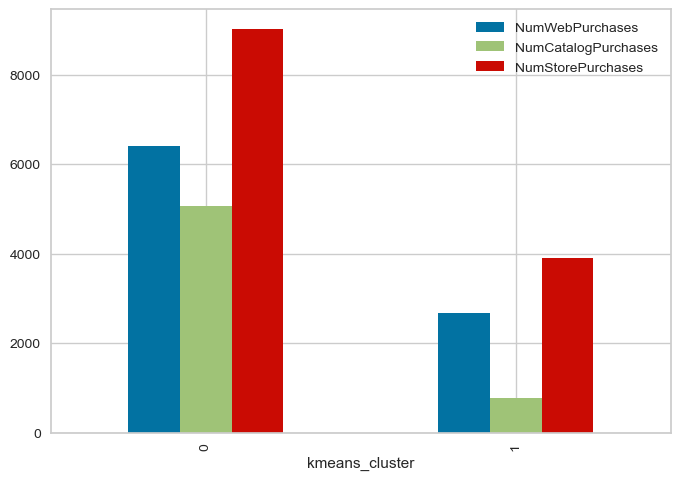

In [381]:
spend_platform_df.T.plot(kind='bar', stacked=False)

In [382]:
db[['NumWebVisitsMonth', 'kmeans_cluster']].groupby('kmeans_cluster').sum()

,NumWebVisitsMonth
kmeans_cluster,
0,4552
1,7326


In [383]:
promotion_list = ['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'kmeans_cluster']
db[promotion_list].groupby('kmeans_cluster').sum()

,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
kmeans_cluster,,,,,,,
0,2663,133,26,83,140,153,223
1,2507,7,3,80,24,5,107


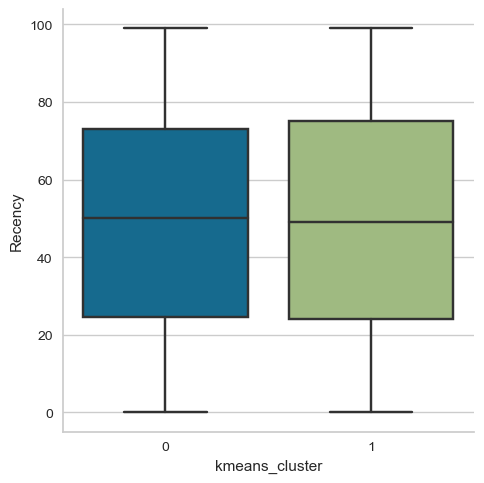

In [384]:
sns.catplot(data = db[['Recency', 'kmeans_cluster']], x='kmeans_cluster', y='Recency', kind='box')

De lo que hemos recopilado podemos concluir que:

 - En nuestro cluster 0 tienen mejores ingesos, gastan y compran mas que en el cluster 1
 - En nuestro cluster 0 el 92% esta graduado, y en el 1 el 85%
 - En nuestro cluster 0 tienen menos hijos o no tienen en comparación con el cluster 1
 - En nuestro cluster 0 prefieren comprar por la tienda 

#### Conlusión

En este proyecto, he analizado un conjunto de datos de clientes mediante la creación de clusters. El flujo de trabajo abarcó limpieza de datos, ingeniería de funciones, gestión de valores atípicos y análisis exploratorios de datos.
Luego continué con el preprocesamiento de datos, que incluía codificación de etiquetas para características categóricas, escalado de todas las características y reducción de dimensionalidad mediante PCA.

Durante la fase de aprendizaje automático, utilizamos el método Elbow para determinar el número óptimo de clústeres (K) para los algoritmos KMeans y AgglomerativeClustering.

Después de ajustar los modelos y evaluarlos podemos concluir que K-means performo mejor para los distintos perfiles de cada grupo, revelando patrones en el comportamiento del consumidor.

#### Recomendaciones futuras

Para mejorar la solidez y aplicabilidad de nuestros hallazgos, podriamos profundizar analizando la distribución de las distintas variables como edad, ingreso, estado civil, productos comprados etc. para cada grupo. 

